In [1]:
import pandas as pd

In [3]:
cd

/home/ubuntu


In [54]:
heart = pd.read_csv('clevelanda.csv')

In [5]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
#Problem Statement: Need to automate the process of initial diagnosis to reduce the waiting time in hospital.

In [55]:
heart.shape
#client provided us 303 rows and 14 columns as initial data release

(303, 14)

In [7]:
heart.info() #checking information about dataset
#We are able to notice strange with 'ca' and 'thal' they must be int but they are in object format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
gender      303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fps         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
class       303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


In [8]:
heart.columns  #checking column names in heart dataset

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fps', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

In [9]:
heart['ca'].head()
#we are able to confirm they are int but why object

0    0
1    3
2    2
3    0
4    0
Name: ca, dtype: object

In [10]:
heart['ca'].value_counts() #going to provide count of each unique value
#We are able to notice '?' in 'ca' column so due to '?' we are able to find datatype as object
#how to treat the '?'

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

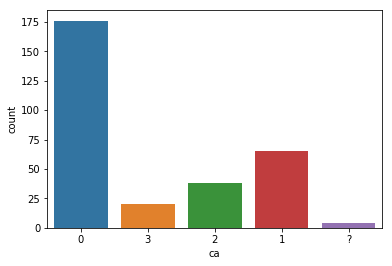

In [12]:
import seaborn as sns
sns.countplot(heart['ca'])
#We are able to notice ca type 0 having more count when compared to other values. 
#Due to more count on ca type 0, our ML algorithm going to be very good with ca type0 and bad with other types
#Is it same with your real time data like more count on ca type 0??

In [13]:
heart['thal'].value_counts()
#We are able to notice '?' in 'thal' column so due to '?' we are able to find datatype as object
#how to treat the '?'

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

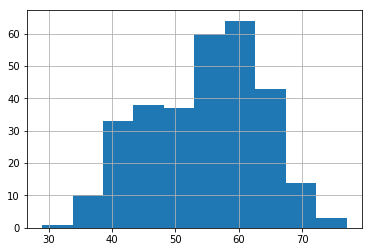

In [14]:
heart['age'].hist()

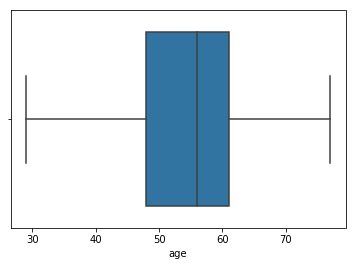

In [15]:
sns.boxplot(heart['age'])

In [16]:
from scipy.stats import skew
skew(heart['age'])
#We are able to see negative skewness

-0.2080240895050745

In [17]:
heart['age'].describe()
#Majority of data is present between 56 to 61 age group, we going to have better prediction at this age group

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [18]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [20]:
#Checking for missing values
heart.isna().sum()
#Zero missing values in this dataset

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

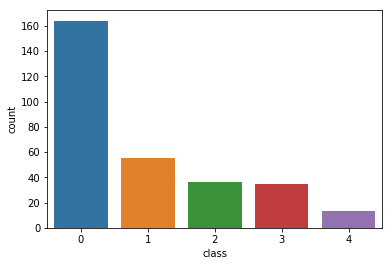

In [21]:
sns.countplot(heart['class'])
#Majority of the data client provided was more focused on '0' diagnosis - abse of heart dis
#Our ML Model may classify prese of heart die as abs of heart die

In [49]:
#Indexing
heart.iloc[1:6,1:5]

,gender,cp,trestbps,chol
1,1,4,160,286
2,1,4,120,229
3,1,3,130,250
4,0,2,130,204
5,1,2,120,236


In [50]:
heart.iloc[1,2]

4

In [56]:
heart = heart.replace('?', np.nan)

In [57]:
heart.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64

In [58]:
heart.shape

(303, 14)

In [59]:
#dropping the null values
heart = heart.dropna()

In [60]:
heart.shape

(297, 14)

In [61]:
heart.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [62]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
gender      297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fps         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null object
thal        297 non-null object
class       297 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [63]:
#Data Conversion
heart['ca'] = pd.to_numeric(heart['ca'])

In [64]:
heart['thal'] = pd.to_numeric(heart['thal'])

In [65]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
gender      297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fps         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
class       297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [66]:
heart.shape
#based on SME input we cleansed the data by removing '?' marks. after data cleaning we got final data as 297,14
#We're able to push this data for ML ALgorithm. 

(297, 14)